# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition. 

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013. 

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [184]:
# @title Download the data
# !wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
# !unzip -qq FullIJCNN2013.zip

from utility import download_and_unzip

download_and_unzip(
    filename="FullIJCNN2013.zip",
    url="https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip",
)


False

### Import Required packages

In [185]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import RandomizedSearchCV

# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import metrics, layers, models, regularizers

import PIL
from PIL import Image
import os
from matplotlib import image as img
from numpy import asarray


### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [186]:
# to see the image using the PIL library

print("Pillow Version:", PIL.__version__)
traffic_sign = Image.open("FullIJCNN2013/00/00000.ppm")
print(traffic_sign.format)
print(traffic_sign.mode)
print(traffic_sign.size)
# show the image
# image.show()


Pillow Version: 11.1.0
PPM
RGB
(30, 30)


In [187]:
# resize image
traffic_sign_resized = traffic_sign.resize((30, 30))
print(traffic_sign_resized.mode)
print(traffic_sign_resized.size)


RGB
(30, 30)


(30, 30, 3)


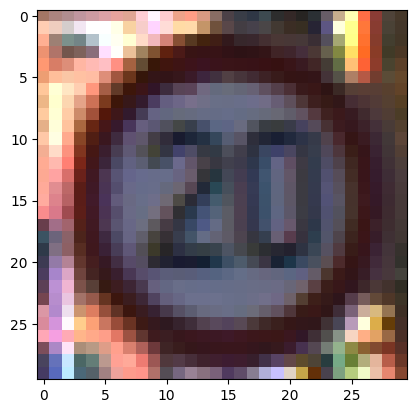

In [188]:
# converting the image to numpy array and then showing the image
traffic_sign_resized_array = asarray(traffic_sign_resized)
print(traffic_sign_resized_array.shape)
plt.imshow(traffic_sign_resized_array)


In [189]:
print(traffic_sign_resized_array)


[[[163 118 101]
  [172 132 127]
  [176 141 143]
  ...
  [138  60  53]
  [ 79  67  57]
  [ 70  56  42]]

 [[255 205 179]
  [239 205 191]
  [212 205 204]
  ...
  [136  60  49]
  [ 74  66  54]
  [ 68  55  42]]

 [[255 175 146]
  [157 128 116]
  [124 145 140]
  ...
  [133  60  44]
  [ 67  62  47]
  [ 67  54  39]]

 ...

 [[124  78  91]
  [172 136 198]
  [254 227 247]
  ...
  [130  74  48]
  [122  53  36]
  [ 87  48  39]]

 [[ 73  68  94]
  [101 114 186]
  [200 231 255]
  ...
  [228 181 156]
  [183  93  73]
  [106  55  40]]

 [[ 69  59  99]
  [ 88 106 189]
  [188 235 255]
  ...
  [235 192 168]
  [230 134 111]
  [133  71  49]]]


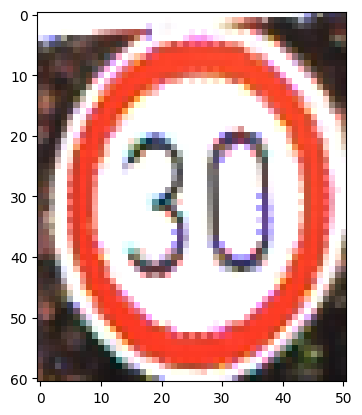

In [190]:
# to see the image using the matplotlib library

data = img.imread("FullIJCNN2013/01/00000.ppm")
plt.imshow(data)


In [191]:
data.shape, data.dtype


((61, 51, 3), dtype('uint8'))

In [192]:
# load the data as per the instructions above


def load_data():
    images = []
    labels = []
    for directory in glob.glob("FullIJCNN2013/*"):
        for file in glob.glob(directory + "/*.ppm"):
            img = Image.open(file)
            img_ = asarray(img.resize((30, 30)))
            images.append(img_.flatten())
            labels.append(int(directory.split("/")[-1]))
    return np.array(images), np.array(labels)


X_full, y_full = load_data()


In [193]:
X_full.shape, X_full.dtype, y_full.shape, y_full.dtype


((1213, 2700), dtype('uint8'), (1213,), dtype('int64'))

In [194]:
X_full[0], y_full[0]


(array([22, 21, 21, ..., 20, 18, 19], dtype=uint8), np.int64(3))

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

43 ['FullIJCNN2013/00', 'FullIJCNN2013/01', 'FullIJCNN2013/02', 'FullIJCNN2013/03', 'FullIJCNN2013/04', 'FullIJCNN2013/05', 'FullIJCNN2013/06', 'FullIJCNN2013/07', 'FullIJCNN2013/08', 'FullIJCNN2013/09', 'FullIJCNN2013/10', 'FullIJCNN2013/11', 'FullIJCNN2013/12', 'FullIJCNN2013/13', 'FullIJCNN2013/14', 'FullIJCNN2013/15', 'FullIJCNN2013/16', 'FullIJCNN2013/17', 'FullIJCNN2013/18', 'FullIJCNN2013/19', 'FullIJCNN2013/20', 'FullIJCNN2013/21', 'FullIJCNN2013/22', 'FullIJCNN2013/23', 'FullIJCNN2013/24', 'FullIJCNN2013/25', 'FullIJCNN2013/26', 'FullIJCNN2013/27', 'FullIJCNN2013/28', 'FullIJCNN2013/29', 'FullIJCNN2013/30', 'FullIJCNN2013/31', 'FullIJCNN2013/32', 'FullIJCNN2013/33', 'FullIJCNN2013/34', 'FullIJCNN2013/35', 'FullIJCNN2013/36', 'FullIJCNN2013/37', 'FullIJCNN2013/38', 'FullIJCNN2013/39', 'FullIJCNN2013/40', 'FullIJCNN2013/41', 'FullIJCNN2013/42']


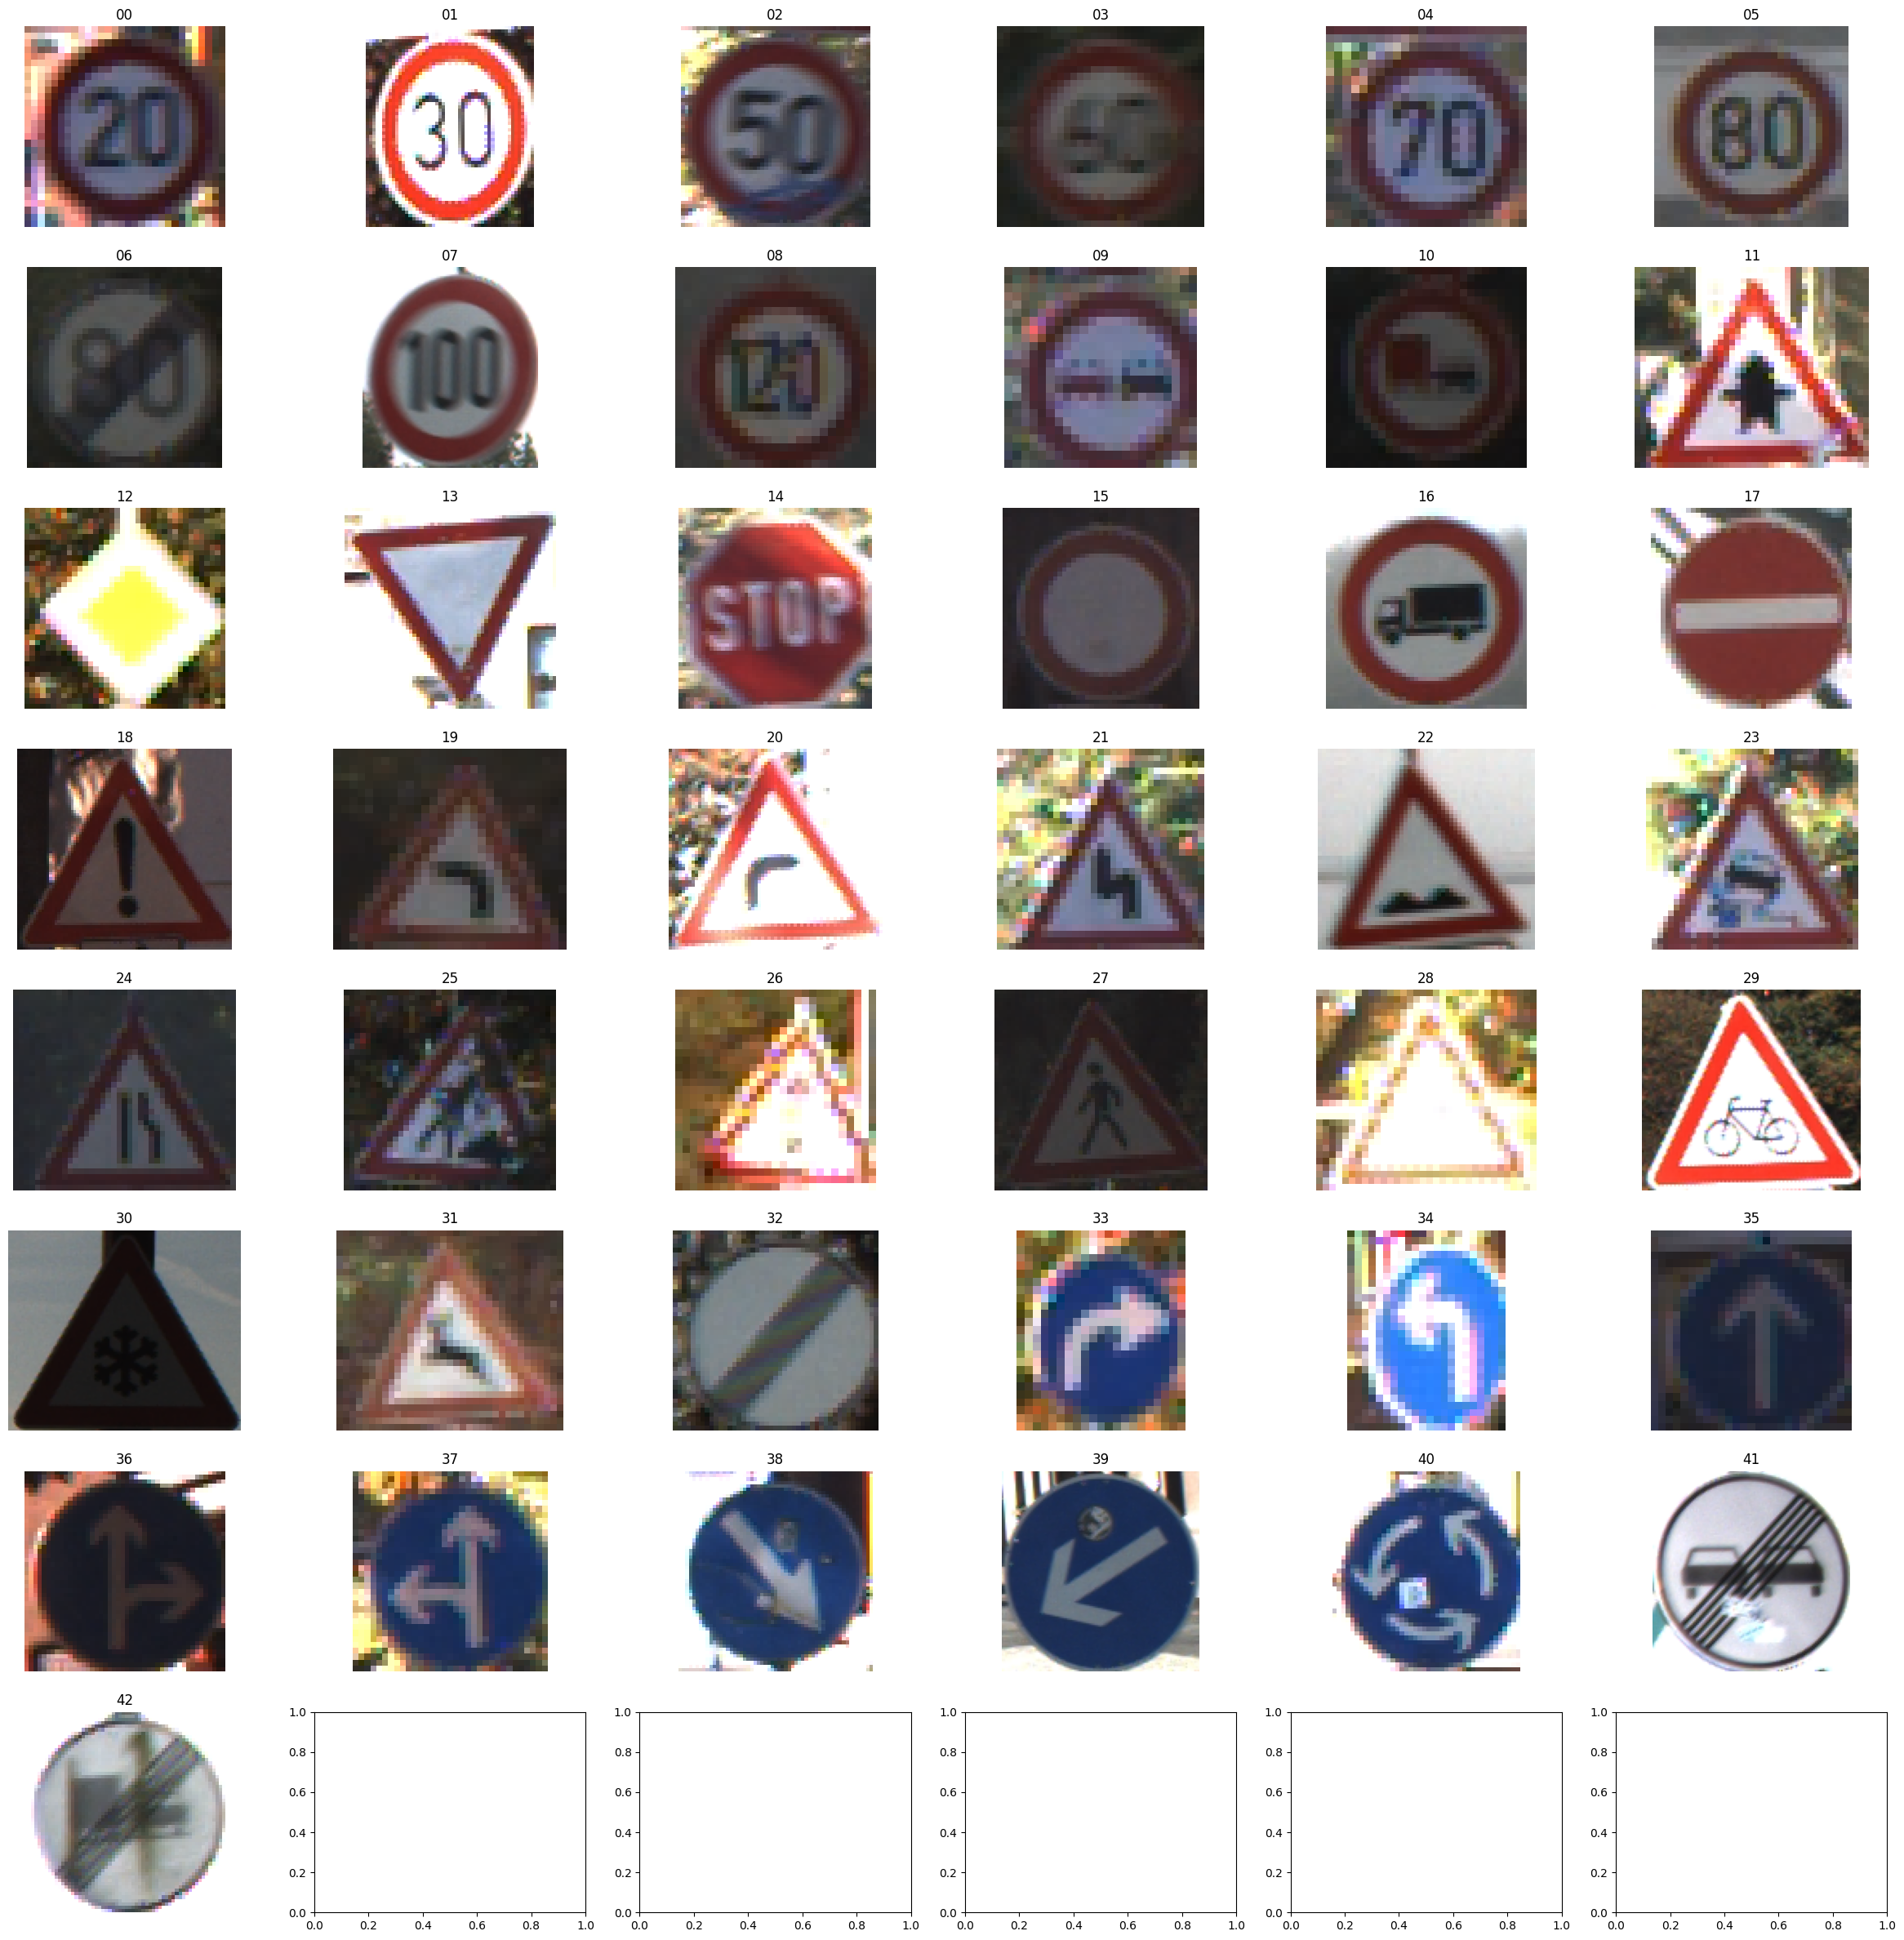

In [195]:
# YOUR CODE HERE
# get an array of subdirectories in the FullIJCNN2013 folder


subdirs = [x[0] for x in os.walk("FullIJCNN2013")]
subdirs = subdirs[1:]
subdirs = sorted(subdirs)
print(len(subdirs), subdirs)

# There are 42 traffic sign classes. All folder have image file in the ppm format starting with 00000.ppm
rows = 8
columns = 6
available_images = len(subdirs)

fig, ax = plt.subplots(rows, columns, figsize=(30, 30))
for i in range(rows):
    for j in range(columns):
        if (i * columns + j) >= available_images:
            break
        ax[i, j].imshow(img.imread(subdirs[i * columns + j] + "/00000.ppm"))
        ax[i, j].set_title(subdirs[i * columns + j].split("/")[-1])
        ax[i, j].axis("off")
plt.show()


#### Plot the distribution of Classes

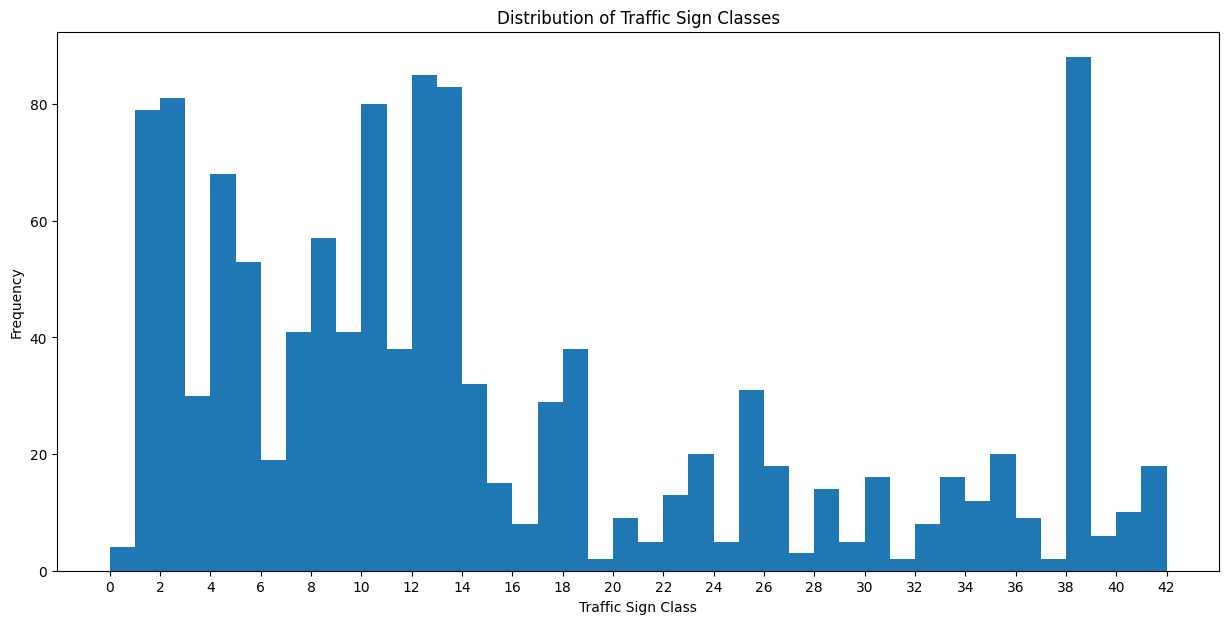

In [196]:
plt.figure(figsize=(15, 7))
plt.hist(y_full, bins=42)
plt.xlabel("Traffic Sign Class")
plt.ylabel("Frequency")
plt.title("Distribution of Traffic Sign Classes")
plt.xticks(np.arange(0, 43, 2))
plt.show()


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [197]:
print(X_full)


[[ 22  21  21 ...  20  18  19]
 [148 179 227 ...  80  92 127]
 [ 55  53  47 ...  46  41  39]
 ...
 [ 54  47  44 ...  22  23  23]
 [ 41  35  29 ...  54  44  30]
 [119  89  56 ... 249 229 220]]


In [198]:
# normalize the pixel values of the images

# X_full = X_full / 255.0
X_full_original = X_full.copy()

X_full_normalized = X_full / 255.0
print(X_full_normalized)

X_full = normalize(X_full, norm="l2", axis=1, copy=False)
print(X_full)


[[0.08627451 0.08235294 0.08235294 ... 0.07843137 0.07058824 0.0745098 ]
 [0.58039216 0.70196078 0.89019608 ... 0.31372549 0.36078431 0.49803922]
 [0.21568627 0.20784314 0.18431373 ... 0.18039216 0.16078431 0.15294118]
 ...
 [0.21176471 0.18431373 0.17254902 ... 0.08627451 0.09019608 0.09019608]
 [0.16078431 0.1372549  0.11372549 ... 0.21176471 0.17254902 0.11764706]
 [0.46666667 0.34901961 0.21960784 ... 0.97647059 0.89803922 0.8627451 ]]
[[0.012737   0.01215804 0.01215804 ... 0.01157909 0.01042118 0.01100013]
 [0.03835519 0.04638905 0.05882857 ... 0.02073254 0.02384242 0.0329129 ]
 [0.00833472 0.00803164 0.0071224  ... 0.00697086 0.00621315 0.00591007]
 ...
 [0.00896837 0.0078058  0.00730756 ... 0.00365378 0.00381986 0.00381986]
 [0.01293349 0.01104078 0.00914808 ... 0.01703435 0.01387984 0.00946353]
 [0.01096674 0.00820201 0.00516082 ... 0.0229472  0.02110406 0.02027464]]


### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [199]:
# YOUR CODE HERE
# Split the data into train and test
# Train the MLP classifier with different parameters
# Get the accuracy score and performance metrics

X_dev, X_test, y_dev, y_test = train_test_split(
    X_full, y_full, test_size=250, random_state=42, stratify=y_full
)
X_train, X_val, y_train, y_val = train_test_split(
    X_dev, y_dev, test_size=250, random_state=42, stratify=y_dev
)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((713, 2700), (250, 2700), (250, 2700), (713,), (250,), (250,))

In [200]:
mlp = MLPClassifier(
    hidden_layer_sizes=(1000, 500, 100),
    # alpha=0.0001,
    max_iter=1000,
    solver="adam",
    verbose=True,
    random_state=42,
    activation="relu",
    validation_fraction=0.1,
)
mlp.fit(X_train, y_train)


Iteration 1, loss = 3.72219956
Iteration 2, loss = 3.51012261
Iteration 3, loss = 3.37171967
Iteration 4, loss = 3.28851713
Iteration 5, loss = 3.18510247
Iteration 6, loss = 3.05674412
Iteration 7, loss = 2.94005540
Iteration 8, loss = 2.83153280
Iteration 9, loss = 2.70943812
Iteration 10, loss = 2.58154986
Iteration 11, loss = 2.47842152
Iteration 12, loss = 2.38714272
Iteration 13, loss = 2.28734049
Iteration 14, loss = 2.18650787
Iteration 15, loss = 2.07430577
Iteration 16, loss = 1.99032399
Iteration 17, loss = 1.88759948
Iteration 18, loss = 1.80008875
Iteration 19, loss = 1.70898847
Iteration 20, loss = 1.62548198
Iteration 21, loss = 1.54015116
Iteration 22, loss = 1.46838451
Iteration 23, loss = 1.40553363
Iteration 24, loss = 1.33747037
Iteration 25, loss = 1.28333406
Iteration 26, loss = 1.21971535
Iteration 27, loss = 1.16561301
Iteration 28, loss = 1.13434229
Iteration 29, loss = 1.08145215
Iteration 30, loss = 1.04787266
Iteration 31, loss = 1.00757178
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(1000, 500, 100), max_iter=1000,
              random_state=42, verbose=True)

In [201]:
print("Mean accuracies across Train, Validation and Test sets:")
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Validation set score: %f" % mlp.score(X_val, y_val))
print("Test set score: %f" % mlp.score(X_test, y_test))


Mean accuracies across Train, Validation and Test sets:
Training set score: 1.000000
Validation set score: 0.808000
Test set score: 0.852000


In [202]:
y_pred = mlp.predict(X_test)


In [203]:
print(classification_report(y_test, y_pred))
# classification_report(y_test, y_pred, output_dict=True)
# classification_report(y_test, y_pred, output_dict=True)["accuracy"]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.78      0.88      0.82        16
           2       0.81      0.76      0.79        17
           3       0.67      0.67      0.67         6
           4       0.93      1.00      0.97        14
           5       0.73      0.73      0.73        11
           6       1.00      1.00      1.00         4
           7       0.75      0.75      0.75         8
           8       0.82      0.75      0.78        12
           9       0.89      1.00      0.94         8
          10       1.00      1.00      1.00        17
          11       1.00      0.88      0.93         8
          12       0.94      0.94      0.94        18
          13       0.89      1.00      0.94        17
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         3
          16       1.00      0.50      0.67         2
          17       1.00    

/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined a

In [204]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 0  1  0 ...  0  0  0]
 [ 0 14  2 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  1 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  2]]


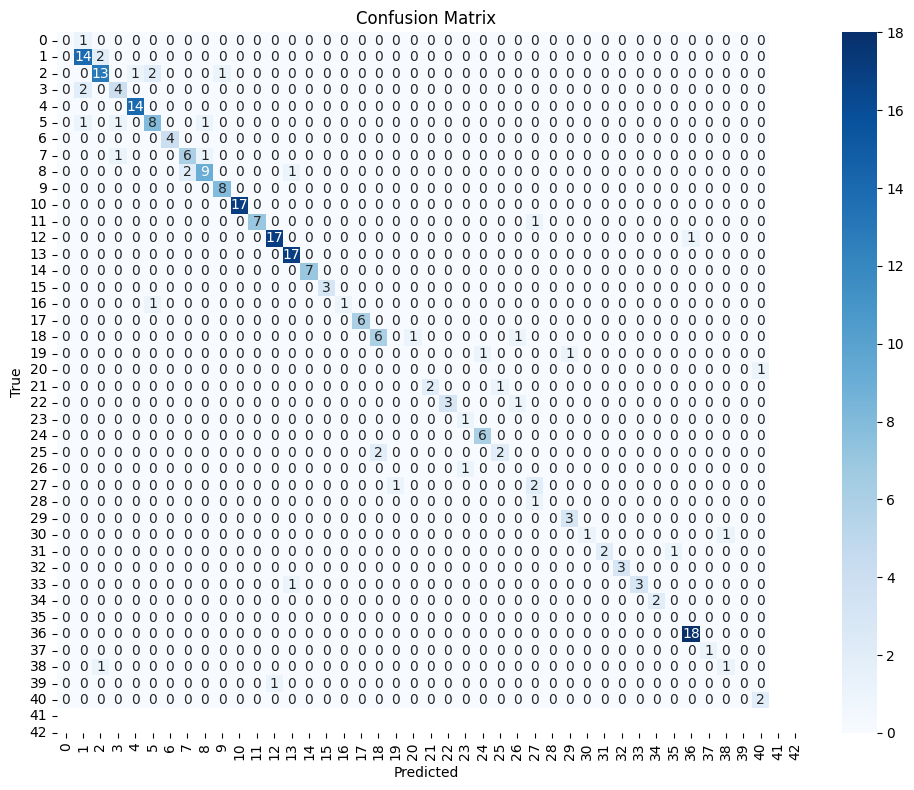

In [205]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(0, 43),
    yticklabels=range(0, 43),
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


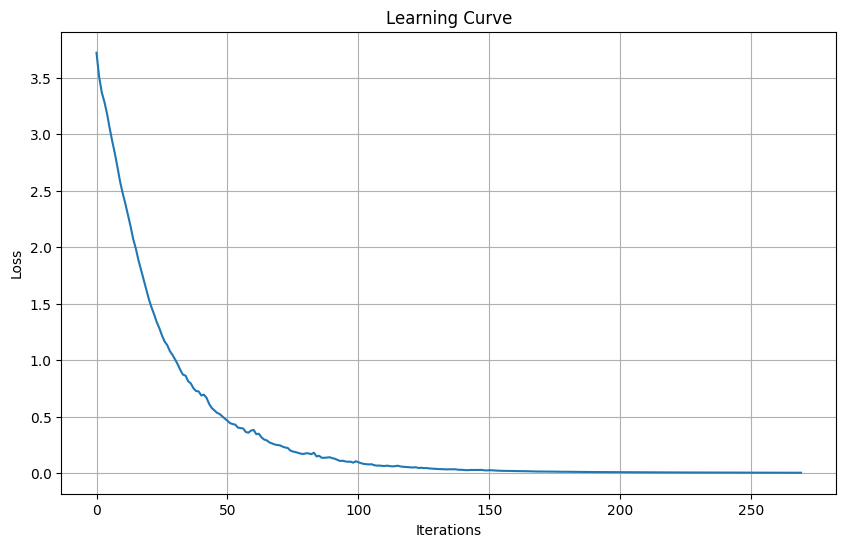

In [206]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title("Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/s

Best parameters found:  {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.005, 'activation': 'tanh'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.65      0.81      0.72        16
           2       0.77      0.59      0.67        17
           3       0.50      0.17      0.25         6
           4       0.88      1.00      0.93        14
           5       0.57      0.73      0.64        11
           6       0.80      1.00      0.89         4
           7       0.67      0.75      0.71         8
           8       0.89      0.67      0.76        12
           9       0.73      1.00      0.84         8
          10       1.00      0.94      0.97        17
          11       0.88      0.88      0.88         8
          12       0.74      0.94      0.83        18
          13       0.94      0.94      0.94        17
          14       1.00      1.0

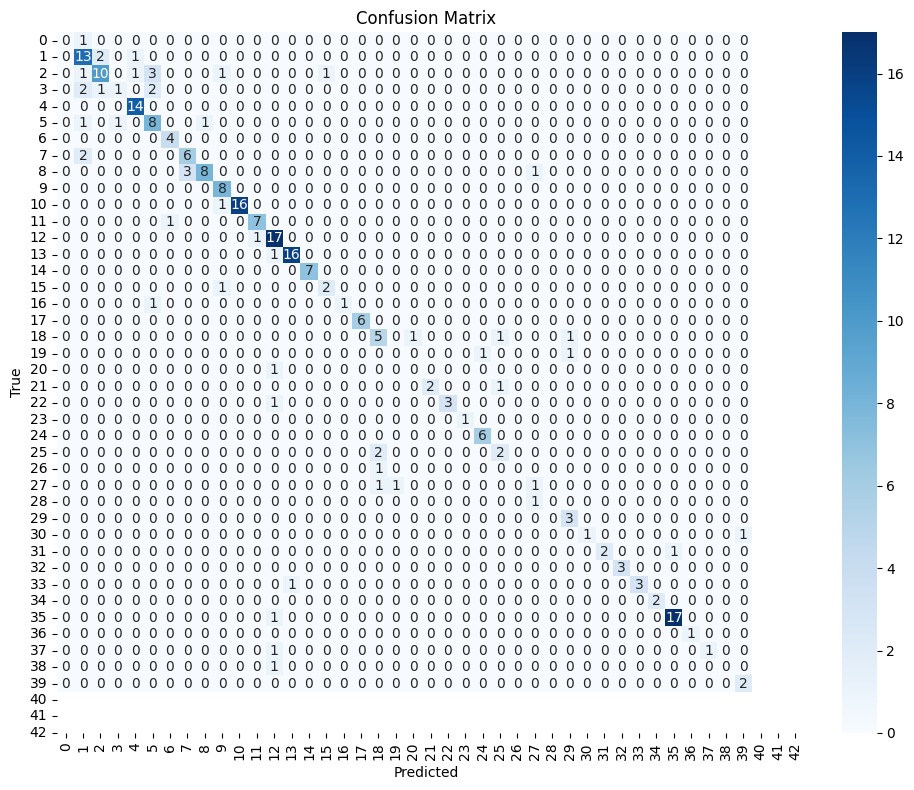

In [207]:
# YOUR CODE HERE

# Define the parameter grid
param_dist = {
    "hidden_layer_sizes": [(50, 100, 50), (100,), (1000, 500, 100)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.005],
    "max_iter": [200, 300],
    "learning_rate": ["constant", "adaptive"],
}


# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    mlp, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Predict on the test set
y_pred = random_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(0, 43),
    yticklabels=range(0, 43),
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=sgd; total time=   4.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=sgd; total time=   4.1s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=sgd; total time=   4.3s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=adam; total time=   4.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=adam; total time=   4.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=adam; total time=   4.8s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   6.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   6.4s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   7.1s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   7.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   7.7s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=sgd; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=sgd; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=sgd; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=adam; total time= 1.2min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=sgd; total time=   4.8s
[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=adam; total time= 1.2min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=sgd; total time=   4.6s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=sgd; total time=   4.7s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=adam; total time=   5.2s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=adam; total time= 1.3min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=adam; total time=   5.0s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=200, solver=adam; total time=   4.7s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   6.6s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   6.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=sgd; total time=   6.5s
[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=adam; total time= 1.3min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   7.4s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   7.4s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 100, 50), learning_rate=adaptive, max_iter=300, solver=adam; total time=   7.3s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=sgd; total time= 1.5min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=sgd; total time= 1.7min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=sgd; total time= 1.7min
[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=adam; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=adam; total time= 1.2min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=sgd; total time= 1.1min
[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=sgd; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=sgd; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=adam; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=adam; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=200, solver=adam; total time= 1.2min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=sgd; total time= 1.4min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=sgd; total time= 1.3min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=sgd; total time= 1.1min


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=adam; total time= 1.1min
[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=adam; total time=  56.2s


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(1000, 500, 100), learning_rate=adaptive, max_iter=300, solver=adam; total time=  57.8s
Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (1000, 500, 100), 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94        16
           2       0.94      0.88      0.91        17
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00        14
           5       0.91      0.91      0.91        11
           6       1.00      1.00      1.00         4
           7       0.60      0.75      0.67         8
           8       0.80      0.67      0.73        12
           9       0.80      1.00      0.89         8
          10       0.94      1.00      0.97        17
          11       0.88      0.88      0.88         8
          12 

/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-d

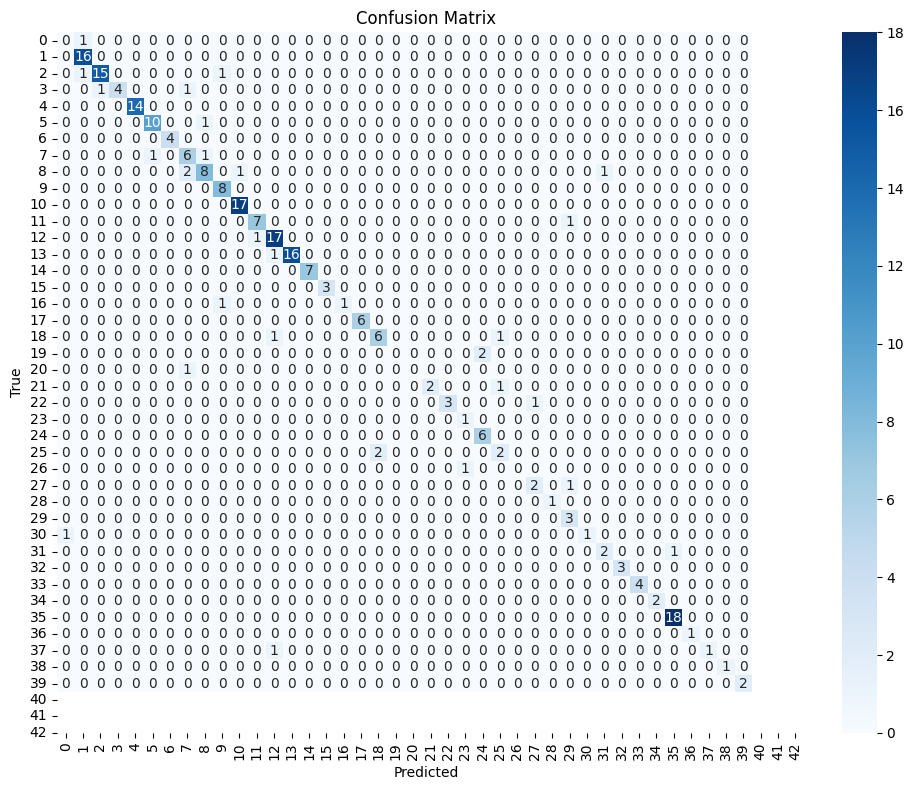

In [208]:
param_grid = {
    "hidden_layer_sizes": [(50, 100, 50), (1000, 500, 100)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    # "alpha": [0.0001, 0.005],
    "max_iter": [200, 300],
    # "learning_rate": ["constant", "adaptive"],
    "learning_rate": ["adaptive"],
}


# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=100)

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(0, 43),
    yticklabels=range(0, 43),
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


#### Try the different algorithms and compare the results with MLP classifier

In [209]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report: ", classification_report)
print("Confusion Matrix: ", confusion_matrix)


Accuracy:  0.788
Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.68      0.81      0.74        16
           2       0.61      0.65      0.63        17
           3       1.00      0.67      0.80         6
           4       0.61      0.79      0.69        14
           5       0.78      0.64      0.70        11
           6       1.00      1.00      1.00         4
           7       0.75      0.75      0.75         8
           8       0.67      0.83      0.74        12
           9       0.89      1.00      0.94         8
          10       0.85      1.00      0.92        17
          11       1.00      0.75      0.86         8
          12       1.00      0.83      0.91        18
          13       0.89      1.00      0.94        17
          14       1.00      1.00      1.00         7
          15       1.00      0.33      0.50         3
          16       1.00      0.50      0

/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-d

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [210]:
print(tf.__version__)


2.18.0


In [211]:
# Step 1 - Build the architecture
keras_nn_model = Sequential()
input_shape = (X_train.shape[1],)
keras_nn_model.add(Dense(1500, activation="relu", input_shape=input_shape))
keras_nn_model.add(Dense(300, activation="relu"))
# keras_nn_model.add(Dense(100, activation="relu"))
keras_nn_model.add(Dense(43, activation="softmax"))
keras_nn_model.summary()


/Users/rajiv-ranjan/Documents/github/rajiv-ranjan/cds-mini-projects/m3/mini-project-1/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 1500)           │     4,051,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 300)            │       450,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 43)             │        12,943 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,514,743 (17.22 MB)

 Trainable params: 4,514,743 (17.22 MB)

 Non-trainable params: 0 (0.00 B)

In [212]:
# Step 2 - Compile the model
keras_nn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adamax",
    metrics=[
        "accuracy",
        # metrics.sparse_categorical_accuracy,
        # metrics.sparse_categorical_crossentropy,
    ],
    # metrics=["accuracy", metrics.sparse_categorical_accuracy],
)


In [213]:
# Step 3 - Fit and Evaluate the model
history = keras_nn_model.fit(
    X_train, y_train, epochs=75, validation_data=(X_val, y_val)
)


Epoch 1/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0539 - loss: 3.5872 - val_accuracy: 0.1160 - val_loss: 3.3101
Epoch 2/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1571 - loss: 3.2628 - val_accuracy: 0.1760 - val_loss: 3.1821
Epoch 3/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1877 - loss: 3.1415 - val_accuracy: 0.2720 - val_loss: 3.0488
Epoch 4/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2522 - loss: 2.9927 - val_accuracy: 0.3240 - val_loss: 2.8973
Epoch 5/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3251 - loss: 2.8199 - val_accuracy: 0.3200 - val_loss: 2.7620
Epoch 6/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3131 - loss: 2.7727 - val_accuracy: 0.3400 - val_loss: 2.6291
Epoch 7/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3634 - loss: 2.5576 - val_accuracy: 0.3040 - val_loss: 2.4967
Epoch 8/75
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3887 - loss: 2.4038 - val_accuracy: 0.4040 - v

In [214]:
keras_nn_model.evaluate(X_test, y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8356 - loss: 0.6516 


[0.6537257432937622, 0.828000009059906]

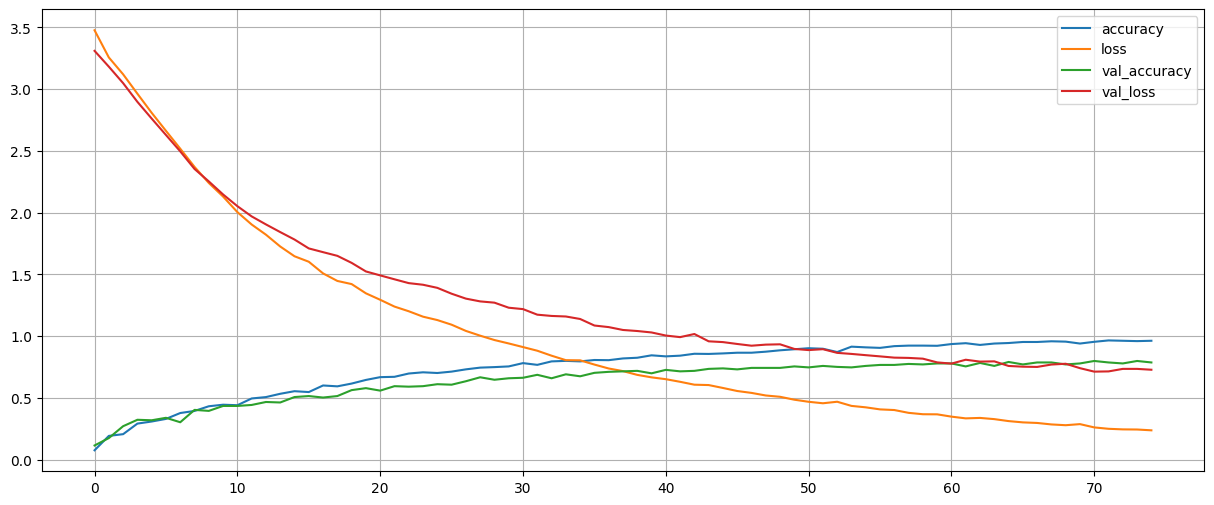

In [215]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(15, 6))
plt.grid(True)
# set the vertical range to [0-1]
# plt.gca().set_ylim(0, 1)
plt.show()


#### Try the same parameters used for MLP Classifier and build the keras model

In [216]:
# YOUR CODE HERE


#### Experiment using Dropout, Regularization and Batch Normalization

In [217]:
(X_train.shape[1],)


(2700,)

In [218]:
# YOUR CODE HERE
model = Sequential(
    [
        # Input layer
        layers.Input(shape=(X_train.shape[1],)),
        # First hidden layer
        layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Activation("tanh"),
        layers.Dropout(0.3),
        # Second hidden layer
        layers.Dense(128, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Activation("tanh"),
        layers.Dropout(0.3),
        # Third hidden layer
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Activation("tanh"),
        layers.Dropout(0.2),
        # Output layer
        layers.Dense(43, activation="softmax"),
    ]
)
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 256)            │       691,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,195 (2.81 MB)

 Trainable params: 736,299 (2.81 MB)

 Non-trainable params: 896 (3.50 KB)

In [219]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)


In [220]:
# Model checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True
)


In [221]:
history = model.fit(
    X_train,
    y_train,
    epochs=75,
    # batch_size=35,
    validation_data=(X_val, y_val),
    # callbacks=[early_stopping, checkpoint],
    # verbose=1,
)

# history = keras_nn_model.fit(
#     X_train, y_train, epochs=75, validation_data=(X_val, y_val))


Epoch 1/75


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 43)

In [ ]:
keras_nn_model.evaluate(X_test, y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.6720 


[0.6623457670211792, 0.800000011920929]

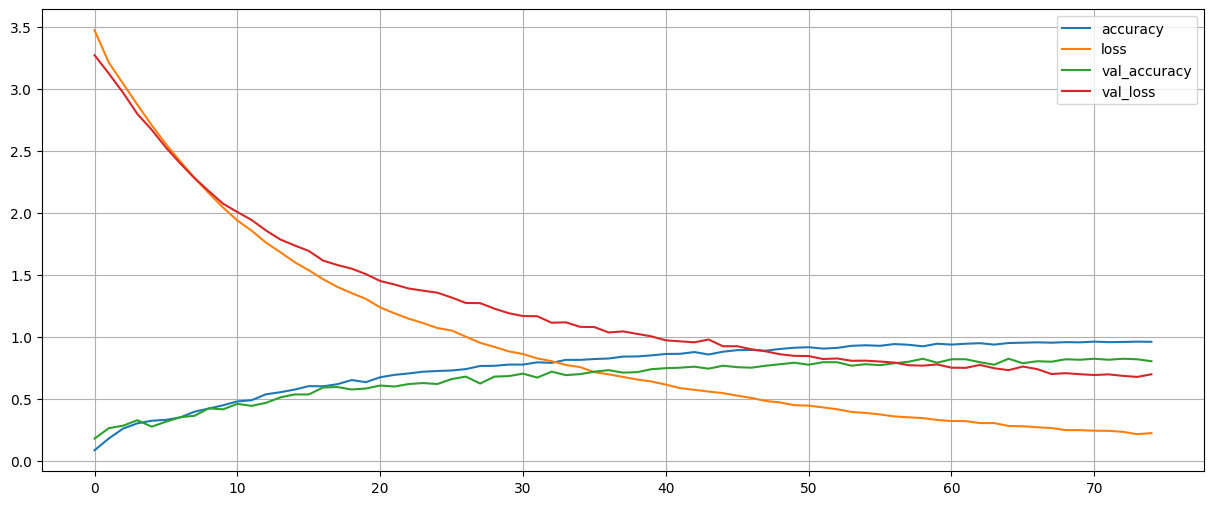

In [ ]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(15, 6))
plt.grid(True)
# set the vertical range to [0-1]
# plt.gca().set_ylim(0, 1)
plt.show()


### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any. 
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.